# Proof of Concept

In [1]:
from abtesting import display_ab_test_results

In [2]:
groups = ['control', 'test']
conversions = [478, 532]
totals = [5323, 5277]

Comparison,Confidence,Relative Increase
test converts higher than control,97%,"9,6%"


Group,Conversion,Total,Observed Rate
control,478,5323,8.98%
test,532,5277,10.08%


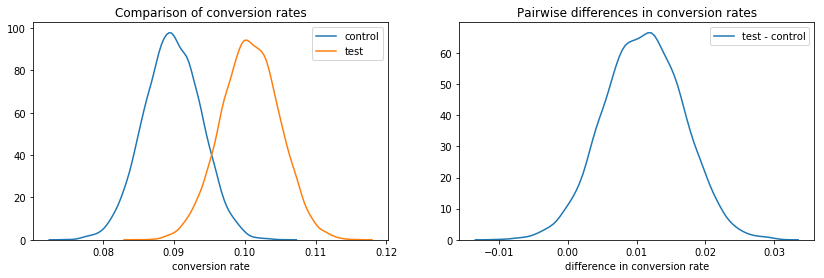

In [3]:
display_ab_test_results(groups, conversions, totals)